In [2]:
from sage.all import *

### Лабораторная работа №1.

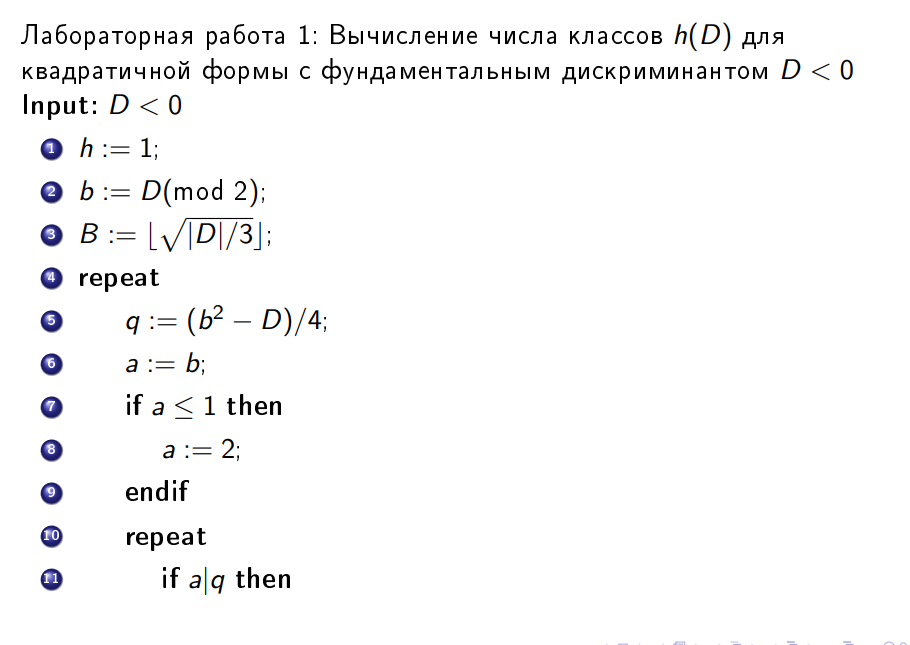
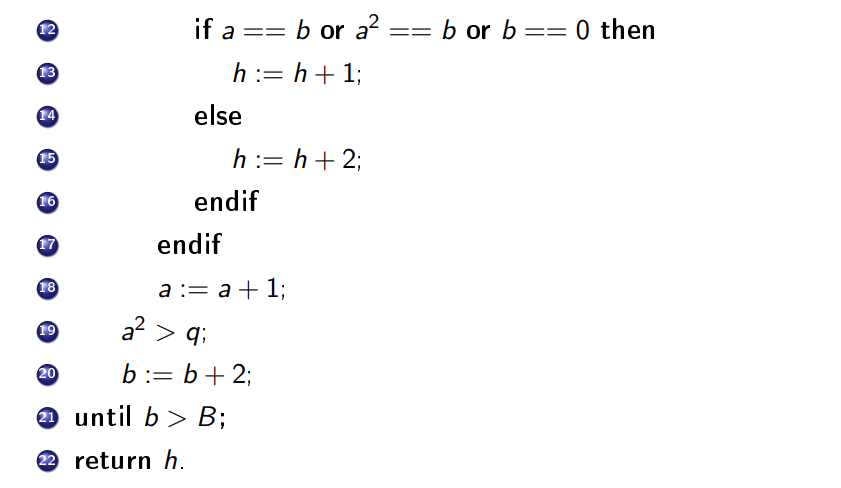

In [4]:
def get_class_count(D: int):
    #~ INPUT
    assert D < 0
    
    h = 0
    b = int(D % 2)
    B = floor(sqrt(abs(D) / 3))
    
    #~ Шаг 4/21
    while b <= B:
        q = (pow(b, 2) - D) / 4
        a = b
        if a <= 1: 
            a = 2
        while pow(a, 2) <= q:
            if q % a == 0:
                if (a == b) or (pow(a, 2) == b) or (b == 0):
                    h += 1
                else: 
                    h += 2
            a += 1
        b += 2
    #~ OUTPUT
    return h

In [20]:
get_class_count(-135)

8

### Лабораторная работа №2.

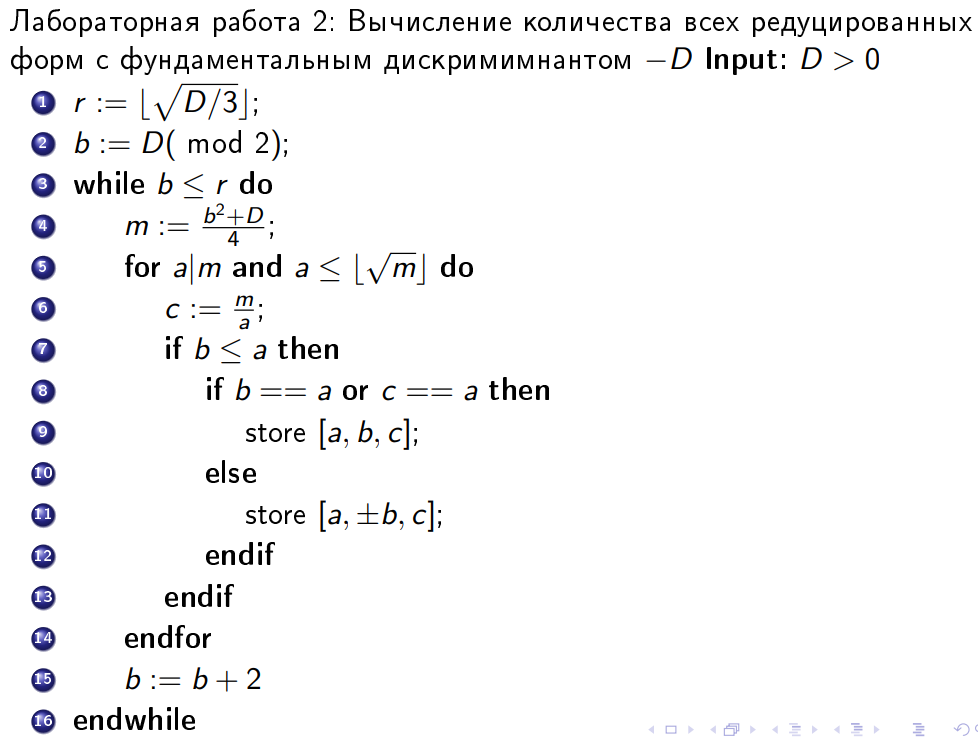

In [8]:
def get_reduced_forms(D: int):
    assert D > 0
    
    r = floor(sqrt(abs(D) / 3))
    b = int(D % 2)
    
    store = []
    while b <= r:
        m = (pow(b, 2) + D) // 4
        for a in range(1, floor(sqrt(m)) + 1):
            if m % a != 0: 
                continue
            c = m // a
            if b <= a:
                if (b == a) or (c == a): 
                    store.append([a, [b], c])
                else:
                    store.append([a, list(set([b, -b])), c])
        b += 2
    return store

In [10]:
get_reduced_forms(25)

[[1, [1], 6], [2, [1, -1], 3]]

### Лабораторная работа №3. Алгоритм Корначчи
Алгоритм для решения диофатовых уравнений $x^2 + dy^2=m$, где $1 \leq d \leq m$, $d$ и $m$ - взаимно просты.

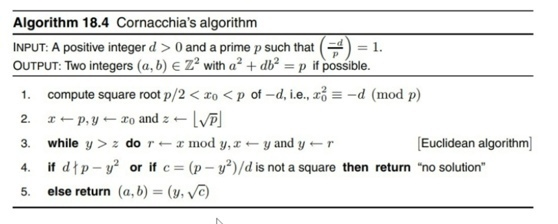


In [11]:
def get_prime(d: int) -> int:
    p = random_prime(100, lbound=30)
    while True:
        if kronecker(p, -d) == 1:
            return p
        p = next_prime(p)

def cornacchi(d: int):
    #~ INPUT
    assert d > 0
    p = get_prime(d)
    assert is_prime(p)

    print(f"{d = }")
    print(f"{p = }")

    #~ Шаг 1
    _d = int(-d % p)
    x_0 = int(sqrt(_d))
    print(f"{x_0 = }")

    #~ Шаг 2
    x = p
    y = x_0
    z = floor(sqrt(p))
    print(f"{z = }")

    #~ Шаг 3 (Алгоритм Евклида)
    while y > z:
        r = int(x % y)
        x = y
        y = r
    
    #~ Шаг 4
    c = int(((p - pow(y, 2)) / d) % p)
    print(
        f"Условие №1: {(p - y**2) % d} != 0 == {(p - y**2) % d != 0}\n"
        f"Условие №2: {kronecker(c, p)} != 1 == {kronecker(c, p) != 1}"
    )
    if (p - y**2) % d != 0 or kronecker(c, p) != 1:
        print("Нет решений!")
        return False
    else:
        #~ Шаг 5
        a = y
        b = int(pow(c, 0.5, p))
        return p, a, b


In [22]:
d = 5
ans = cornacchi(5)
if ans is not False:
    p, a, b = ans
    print(
        f"{a = }, {b = }\n"
        f"Уравнение {a}^2 + {d} * {b}^2 = {p} == {(a**2 + d * b**2) == p}"
    )

d = 5
p = 41
x_0 = 6
z = 6
Условие №1: 0 != 0 == False
Условие №2: 1 != 1 == False
a = 6, b = 1
Уравнение 6^2 + 5 * 1^2 = 41 == True
